In [1]:
import pandas as pd
import numpy as np

import popsims
from popsims.galaxy import Disk
from astropy.coordinates import SkyCoord
import astropy.units as u

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
p=popsims.Population(evolmodel_name='burrows1997', age_range=[0.1, 8], mass_range=[0.01, 0.1], nsample=int(1e4))

In [4]:
p.simulate()

In [5]:
m=Disk()

In [6]:
ra, dec=popsims.random_angles(10)
s=SkyCoord(ra=ra*u.radian,dec=dec*u.radian)
dmax=1000
p.add_distances( Disk(H=300, L=2600),s.galactic.l.radian,s.galactic.b.radian, 0.1,  dmax)

In [7]:
mag_cols=['VISTA_J', 'VISTA_H', 'VISTA_KS']

In [8]:
p.add_magnitudes(mag_cols, get_from='spt',object_type='dwarfs')

In [9]:
p.add_kinematics(s.ra.degree, s.dec.degree, kind='thin_disk', red_prop_motions_keys=mag_cols)

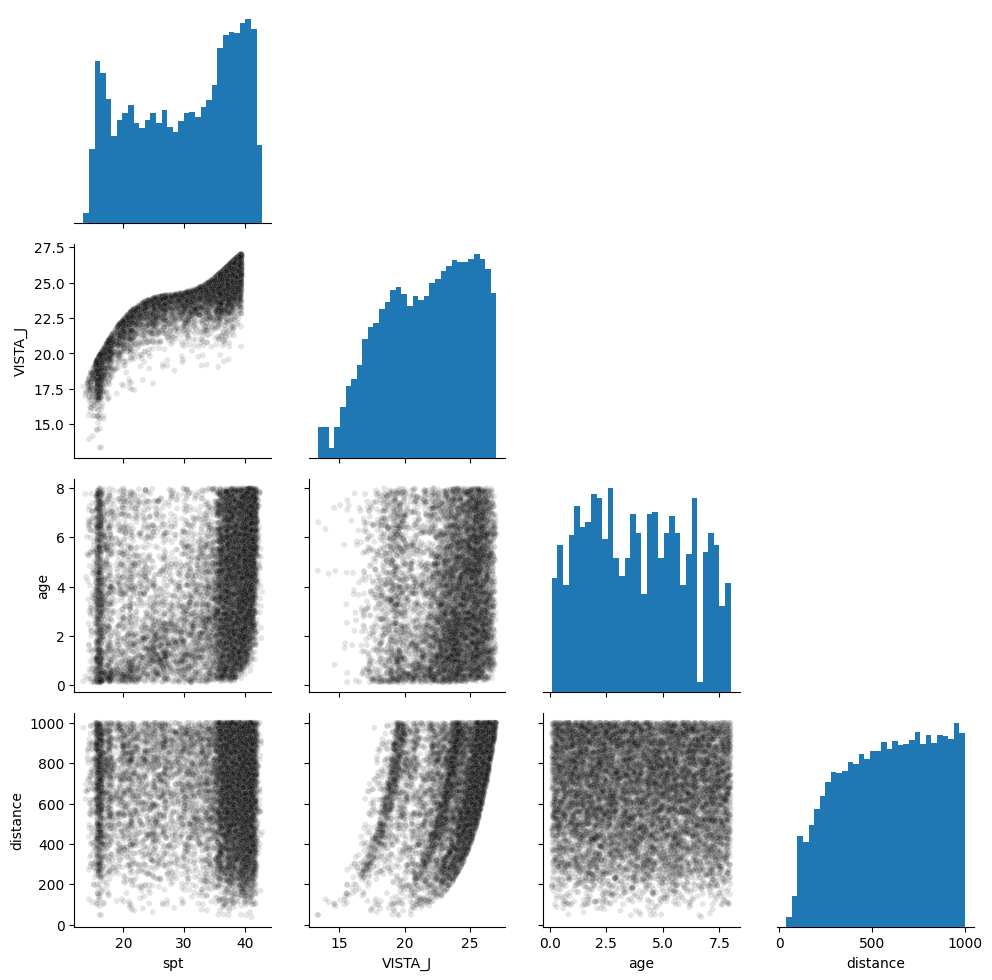

In [10]:
p.visualize(keys=['spt', 'VISTA_J', 'age', 'distance'])